In [2]:
%load_ext autoreload    
%autoreload 2
from plot import *


results_path = "../../results/sgd-steps"


save_path = os.path.join(results_path, "plots")
if os.path.exists(save_path):
    os.makedirs(os.path.join(save_path), exist_ok=True)

metrics = [
    "evals_by_batch",
    "normed_fitness_by_batch",
    # "pruned_cxs",
    # "offspring_by_batch",
    # "fitness_by_batch",
    # "lr_by_batch",
    "cx_by_batch",
    "nodes_by_batch",

]



In [ ]:

condition_filter = None
results = read_tensor_results(results_path, metrics, max_runs=None, condition_filter=condition_filter)

In [2]:
results['condition_path'] = results['condition'].copy()

In [3]:
avg_nodes_at_max_evals = []
avg_cx_at_max_evals = []

def get_max_evals(group):
    return group.loc[group.evals_by_batch.idxmax()]

results_max_evals = results.groupby(["condition", "run", "target"]).apply(get_max_evals).reset_index(drop=True)

print(results_max_evals)    


     batch   condition  cx_by_batch  evals_by_batch  nodes_by_batch  \
0     6249  000_steps_         96.0        100000.0             0.0   
1     6249  000_steps_        102.0        100000.0             0.0   
2     6249  000_steps_        107.0        100000.0             0.0   
3     6249  000_steps_         79.0        100000.0             0.0   
4     6249  000_steps_        100.0        100000.0             0.0   
..     ...         ...          ...             ...             ...   
117    991  100_steps_        529.0        100092.0            38.0   
118    998  100_steps_        498.0        100099.0            50.0   
119    999  100_steps_        562.0        100100.0            47.0   
120    994  100_steps_        552.0        100095.0            41.0   
121    990  100_steps_        801.0        100091.0            35.0   

     normed_fitness_by_batch                       run            target  \
0                   0.330211   run_1220579775122379246    data/apple.pn

In [4]:
avg_nodes_at_max_evals = results_max_evals.groupby(["target", "condition"]).nodes_by_batch.mean()
avg_cx_at_max_evals = results_max_evals.groupby(["target", "condition"]).cx_by_batch.mean()
# convert to dict
avg_nodes_at_max_evals = avg_nodes_at_max_evals.to_dict()
avg_cx_at_max_evals = avg_cx_at_max_evals.to_dict()
print(f"avg_nodes_at_max_evals: {avg_nodes_at_max_evals}")
print(f"avg_cx_at_max_evals: {avg_cx_at_max_evals}")


raise("stop")

avg_nodes_at_max_evals: {('data/apple.png', '000_steps_'): 0.0, ('data/apple.png', '016_steps_'): 80.0, ('data/apple.png', '1000_steps_'): 25.600000381469727, ('data/apple.png', '100_steps_'): 45.599998474121094, ('data/dolphin.png', '000_steps_'): 0.0, ('data/dolphin.png', '016_steps_'): 74.0, ('data/dolphin.png', '1000_steps_'): 23.899999618530273, ('data/dolphin.png', '100_steps_'): 44.099998474121094, ('data/skull.png', '000_steps_'): 0.0, ('data/skull.png', '016_steps_'): 90.11111450195312, ('data/skull.png', '1000_steps_'): 22.200000762939453, ('data/skull.png', '100_steps_'): 51.29999923706055, ('data/sunrise.png', '000_steps_'): 0.0, ('data/sunrise.png', '016_steps_'): 76.66666412353516, ('data/sunrise.png', '1000_steps_'): 23.299999237060547, ('data/sunrise.png', '100_steps_'): 41.599998474121094}
avg_cx_at_max_evals: {('data/apple.png', '000_steps_'): 76.57142639160156, ('data/apple.png', '016_steps_'): 689.75, ('data/apple.png', '1000_steps_'): 796.7000122070312, ('data/appl

In [5]:
import sys
sys.path.append("../")
from analysis_util import *
import torch
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


cppns, all_inputs, configs, targets = get_cppns(results, os.path.join(results_path, "conditions"), device)



100%|██████████| 626/626 [00:01<00:00, 354.31it/s]



Loaded 2 genomes


100%|██████████| 590/590 [00:00<00:00, 631.62it/s]



Loaded 2 genomes


100%|██████████| 11/11 [00:00<00:00, 17.19it/s]



Loaded 2 genomes


100%|██████████| 100/100 [00:00<00:00, 113.34it/s]



Loaded 2 genomes


100%|██████████| 626/626 [00:00<00:00, 1282.68it/s]



Loaded 2 genomes


100%|██████████| 590/590 [00:00<00:00, 946.36it/s] 



Loaded 2 genomes


100%|██████████| 11/11 [00:00<00:00, 17.15it/s]



Loaded 2 genomes


100%|██████████| 100/100 [00:00<00:00, 115.33it/s]



Loaded 2 genomes


100%|██████████| 626/626 [00:00<00:00, 1268.71it/s]



Loaded 2 genomes


100%|██████████| 598/598 [00:00<00:00, 999.05it/s] 



Loaded 2 genomes


100%|██████████| 11/11 [00:00<00:00, 18.88it/s]



Loaded 2 genomes


100%|██████████| 100/100 [00:00<00:00, 115.10it/s]



Loaded 2 genomes


100%|██████████| 626/626 [00:00<00:00, 1262.63it/s]



Loaded 2 genomes


100%|██████████| 589/589 [00:00<00:00, 884.62it/s] 



Loaded 2 genomes


100%|██████████| 11/11 [00:00<00:00, 17.16it/s]



Loaded 2 genomes


100%|██████████| 100/100 [00:00<00:00, 154.68it/s]



Loaded 2 genomes


In [6]:
random_topology_results = {}
evolved_topology_results = {}

In [35]:
N_TRIALS = 10


In [36]:
from norm import read_norm_data
from sgd_weights import sgd_weights

from cppn import CPPN
from tqdm import trange
from move_config import MoveConfig
from cppn.visualize import visualize_network
import copy 
from tqdm import tqdm

pbar = tqdm(total=len(avg_nodes_at_max_evals.keys()) * N_TRIALS)


for (target_name, condition) in avg_nodes_at_max_evals.keys():
    # for cond in results.condition.unique():
        inputs = torch.tensor(all_inputs[(target_name,condition)]).to(device)
        config = configs[(target_name,condition)]
        norm = read_norm_data(os.path.join("../", config.norm_df_path), config.target_name)
        evolved_cppn = cppns[(target_name,condition)]
        
        if isinstance(config.target, str):
            target = load_target_from_config(config)
        else:
            target = config.target
        
        if config.output_activation is not None and len(config.output_activation) == 0:
            config.output_activation = None
        
        n_hidden = int(avg_nodes_at_max_evals[(target_name,condition)])
        n_cx = int(avg_cx_at_max_evals[(target_name,condition)])
        
        random_topology_results[(target_name, condition)] = []
        for trial in trange(N_TRIALS):
            config_copy = copy.deepcopy(config)
            if False:
                cppn = CPPN(config_copy)
                
                
                tries = 0
                while len(cppn.hidden_nodes) != n_hidden:
                    if len(cppn.hidden_nodes) > n_hidden:
                        cppn.remove_node(config)
                    if len(cppn.hidden_nodes) < n_hidden:
                        cppn.add_node(config)
                    
                    if tries > 100:
                        # print("breaking")
                        break
                    
                    cppn.update_layers()
                
                # print("nodes:", len(cppn.hidden_nodes))

                
                for _ in range(20):
                    cppn.mutate_activations(config.prob_mutate_activation, config)
                
                # print("cxs:", len(cppn.enabled_connections))
                tries = 0
                while len(cppn.enabled_connections) != n_cx:
                    if len(cppn.enabled_connections) > n_cx:
                        cppn.disable_connection()
                        cppn.prune(config)
                    else:
                        cppn.add_connection(config)
                    cppn.update_layers()
                    cppn.disable_invalid_connections(config)
                    tries += 1
                    if tries > 10000:
                        # print("breaking")
                        break
                    
                    # print("after cxs:", len(cppn.enabled_connections))
            else:
                total_connections = config.num_inputs * config.hidden_nodes_at_start[0]
                for n_hd in config.hidden_nodes_at_start[1:]:
                    total_connections += n_hd * n_hd
                total_connections += config.hidden_nodes_at_start[-1] * config.num_outputs
                config_copy.init_connection_probability = n_cx / total_connections
                config_copy.init_connection_probability_fourier = n_cx / total_connections
                cppn = CPPN(config_copy)
            
    
            # config_copy.sgd_steps = 100_000
            # config_copy.sgd_steps = 2
            # config_copy.sgd_early_stop = 10
            
            
            # visualize_network(cppn, config, visualize_disabled=False, show_weights=False, save_name=None, show=True)
            
            # plt.title("Before")
            # plt.imshow(cppn(inputs, channel_first=False).cpu().detach().numpy(),cmap="gray")
            # plt.show()
            if config_copy.sgd_steps == 0:
                config_copy.sgd_steps = 1 # TODO hacky but shouldn't affect results much
            
            config_copy.sgd_learning_rate = 0.1 * config.sgd_learning_rate
            
            losses = torch.zeros(config_copy.sgd_steps)
            
            sgd_weights([cppn], None, inputs, target, config_copy.objective_functions, norm, config_copy, config_copy.sgd_early_stop, losses, skip_pbar=True)
            
            # plt.title("After")
            # plt.imshow(cppn(inputs, channel_first=False).cpu().detach().numpy(),cmap="gray")
            # plt.show()
            random_topology_results[(target_name, condition)].append(losses)
            
            
            # losses = torch.zeros(config_copy.sgd_steps)
            # evolved_cppn.reset_weights()
            # sgd_weights([evolved_cppn], None, inputs, target, config_copy.objective_functions, norm, config_copy, config_copy.sgd_early_stop, losses, skip_pbar=True)
            # evolved_topology_results[(target_name, condition)] = losses
            
            pbar.update(1)
            
for k,v in random_topology_results.items():
    if len(v) > 0:
        
        random_topology_results[k] = torch.stack(v).cpu().numpy()
        

100%|██████████| 16/16 [52:33<00:00, 197.12s/it]
/tmp/ipykernel_92614/2014119454.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(all_inputs[(target_name,condition)]).to(device)


100%|██████████| 10/10 [00:02<00:00,  3.52it/s]
/tmp/ipykernel_92614/2014119454.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(all_inputs[(target_name,condition)]).to(device)


100%|██████████| 10/10 [01:22<00:00,  8.28s/it]
/tmp/ipykernel_92614/2014119454.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(all_inputs[(target_name,condition)]).to(device)


100%|██████████| 10/10 [1:35:09<00:00, 571.00s/it]
/tmp/ipykernel_92614/2014119454.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(all_inputs[(target_name,condition)]).to(device)


100%|██████████| 10/10 [08:42<00:00, 52.20s/it]
/tmp/ipykernel_92614/2014119454.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(all_inputs[(target_name,condition)]).to(device)


100%|██████████| 10/10 [00:03<00:00,  3.00it/s]
/tmp/ipykernel_92614/2014119454.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(all_inputs[(target_name,condition)]).to(device)


100%|██████████| 10/10 [01:21<00:00,  8.20s/it]
/tmp/ipykernel_92614/2014119454.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(all_inputs[(target_name,condition)]).to(device)


100%|██████████| 10/10 [1:33:11<00:00, 559.17s/it]
/tmp/ipykernel_92614/2014119454.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(all_inputs[(target_name,condition)]).to(device)


100%|██████████| 10/10 [08:45<00:00, 52.52s/it]
/tmp/ipykernel_92614/2014119454.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(all_inputs[(target_name,condition)]).to(device)


100%|██████████| 10/10 [00:02<00:00,  4.68it/s]
/tmp/ipykernel_92614/2014119454.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(all_inputs[(target_name,condition)]).to(device)


100%|██████████| 10/10 [01:01<00:00,  6.13s/it]
/tmp/ipykernel_92614/2014119454.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(all_inputs[(target_name,condition)]).to(device)


 60%|██████    | 6/10 [31:53<21:28, 322.20s/it]

: 

In [ ]:
# print(random_topology_results)
random_top_df = pd.DataFrame(columns=["target", "trial", "loss", "step"])

random_top_results = []
for (target_name, condition), losses in random_topology_results.items():
    print(target_name, condition)
    # for i, loss in enumerate(losses):
        # print(losses)
        # l = loss[-1]
        # l = 1.0 - l
        # random_top_results.append({"target": target_name, "trial": i, "normed_fitness_by_batch": l.item(), "step": len(losses)-1, "condition": condition})
            

data/apple.png 000_steps_
data/apple.png 016_steps_
data/apple.png 1000_steps_
data/apple.png 100_steps_
data/dolphin.png 000_steps_
data/dolphin.png 016_steps_
data/dolphin.png 1000_steps_
data/dolphin.png 100_steps_
data/skull.png 000_steps_
data/skull.png 016_steps_
data/skull.png 1000_steps_
data/skull.png 100_steps_
data/sunrise.png 000_steps_
data/sunrise.png 016_steps_
data/sunrise.png 1000_steps_
data/sunrise.png 100_steps_


In [ ]:
print(random_topology_results)
random_top_df = pd.DataFrame(columns=["target", "trial", "loss", "step"])

random_top_results = []
for (target_name, condition), losses in random_topology_results.items():
    for i, loss in enumerate(losses):
        print(losses)
        if len(loss) < 1:
            continue
        l = loss[-1]
        l = 1.0 - l
        random_top_results.append({"target": target_name, "trial": i, "normed_fitness_by_batch": l.item(), "step": len(losses)-1, "condition": condition})
            
random_top_df = pd.DataFrame(random_top_results)
random_top_df['topology'] = "random"

            

# compare results to random topology

import seaborn as sns

move_results = results_max_evals.copy()
move_results['topology'] = "move"
print(move_results)
final_df = pd.concat([move_results, random_top_df])


final_df.to_csv(os.path.join(save_path, "move_vs_random_top_fitness_at_end.csv"))

{('data/apple.png', '000_steps_'): array([[0.78152144]], dtype=float32), ('data/apple.png', '016_steps_'): array([[0.83984137, 0.8357198 , 0.8330572 , 0.8308948 , 0.82880014,
        0.82705456, 0.825505  , 0.8242038 , 0.8227934 , 0.82240987,
        0.8214471 , 0.8201418 , 0.81937826, 0.8183628 , 0.8181356 ,
        0.8176531 ]], dtype=float32), ('data/apple.png', '1000_steps_'): array([[0.78121364, 0.77611005, 0.7717838 , 0.7680243 , 0.76462644,
        0.761624  , 0.75887996, 0.7564526 , 0.75417995, 0.7520403 ,
        0.74992514, 0.747926  , 0.7462304 , 0.7447028 , 0.74331045,
        0.7420757 , 0.74100035, 0.7397629 , 0.73848414, 0.73726976,
        0.73604447, 0.7348213 , 0.7335882 , 0.73238945, 0.73128724,
        0.7303003 , 0.7292412 , 0.72818303, 0.72702014, 0.7259711 ,
        0.72492903, 0.7240769 , 0.7231916 , 0.72217005, 0.7212888 ,
        0.7204418 , 0.7195742 , 0.7187059 , 0.7179322 , 0.7169225 ,
        0.7157893 , 0.7148663 , 0.71397924, 0.71311617, 0.7122656 ,
    

In [1]:
final_df = pd.read_csv(os.path.join(save_path, "move_vs_random_top_fitness_at_end.csv"))

NameError: name 'pd' is not defined

In [ ]:
pretty_names = {
    "000_steps_": "0",
    "016_steps_": "16",
    "100_steps_": "100",
    "1000_steps_": "1000",
    "move": "Evolved (MOVE)",
    "random": "Random Topology"
    
}

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

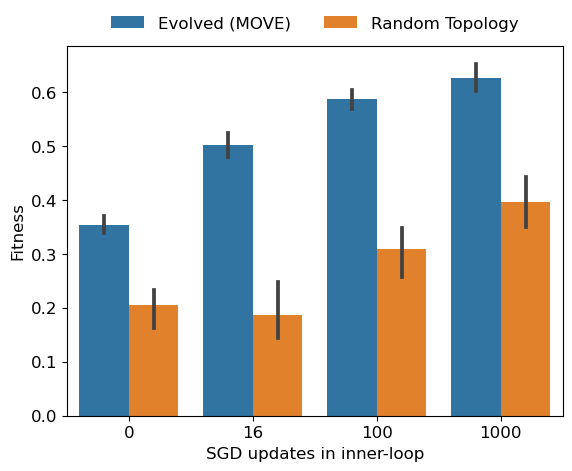

In [ ]:

plot_df = final_df.copy()

plot_df = plot_df.rename(columns={"topology": "Topology"})

plot_df['Topology'] = plot_df['Topology'].apply(lambda x: pretty_names[x] if x in pretty_names else x)

plot_df['condition'] = plot_df['condition'].apply(lambda x: pretty_names[x] if x in pretty_names else x)

# order conditions

plot_df['condition'] = pd.Categorical(plot_df['condition'], ["0", "16", "100", "1000"])

ax = sns.barplot(data=plot_df, x="condition", y="normed_fitness_by_batch", hue="Topology")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
plt.xlabel("SGD updates in inner-loop")
plt.ylabel("Fitness")
plt.savefig(os.path.join(save_path, "move_vs_random_top_fitness_at_end.pdf"), bbox_inches='tight')
plt.show()


In [ ]:
random_top_inner_loop_results = []
for (target_name, condition), losses in random_topology_results.items():
    if condition != "100_steps_":
        continue
    for i, loss in enumerate(losses):
        for step_i, l in enumerate(loss):
            l = 1.0 - l
            random_top_inner_loop_results.append({"target": target_name, "trial": i, "normed_fitness_by_batch": l.item(), "step": step_i, "condition": condition})
            
random_top_inner_loop_df = pd.DataFrame(random_top_inner_loop_results)
random_top_inner_loop_df['topology'] = "random"
random_top_inner_loop_df['batch'] = "random topology"

random_top_inner_loop_df.to_csv(os.path.join(save_path, "random_top_inner_loop_results.csv"))
random_top_inner_loop_df


NameError: name 'random_topology_results' is not defined

In [ ]:
first_last_df = pd.read_csv("/users/j/s/jsdean/scratch/move/public_github/analysis/100-steps-first-last-sgd-steps-inner-loop.csv")
first_last_df['topology'] = "move"
first_last_df = first_last_df[first_last_df['step'] < 100]
first_last_df


,Unnamed: 0,run,condition_path,target,batch,step,loss,topology
0,0,run_13203715474970448366,100_steps_,data/sunrise.png,first,0,0.770263,move
1,1,run_13203715474970448366,100_steps_,data/sunrise.png,first,1,0.765430,move
2,2,run_13203715474970448366,100_steps_,data/sunrise.png,first,2,0.763946,move
3,3,run_13203715474970448366,100_steps_,data/sunrise.png,first,3,0.760944,move
4,4,run_13203715474970448366,100_steps_,data/sunrise.png,first,4,0.758359,move
...,...,...,...,...,...,...,...,...
39595,95,run_12186220164729475566,100_steps_,data/dolphin.png,last,95,0.614266,move
39596,96,run_12186220164729475566,100_steps_,data/dolphin.png,last,96,0.613715,move
39597,97,run_12186220164729475566,100_steps_,data/dolphin.png,last,97,0.613255,move
39598,98,run_12186220164729475566,100_steps_,data/dolphin.png,last,98,0.612712,move


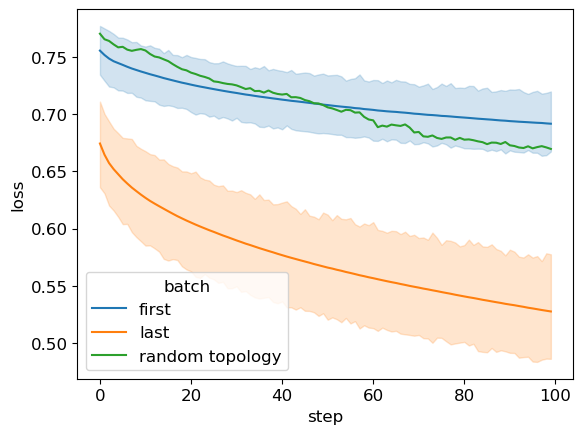

In [ ]:
inner_loop_df = pd.concat([first_last_df, random_top_inner_loop_df])

sns.lineplot(data=inner_loop_df, x="step", y="loss", hue="batch")
plt.show()